<a href="https://colab.research.google.com/github/lauracguevaraa-tech/Base-de-Datos-Real/blob/main/Copia_de_Prompt_base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4099 - loss: 1.1803 - val_accuracy: 0.2500 - val_loss: 1.1609
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3146 - loss: 1.2106 - val_accuracy: 0.3500 - val_loss: 1.1200
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3405 - loss: 1.1278 - val_accuracy: 0.3500 - val_loss: 1.1027
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4721 - loss: 1.0261 - val_accuracy: 0.4000 - val_loss: 1.0956
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4850 - loss: 0.9977 - val_accuracy: 0.3750 - val_loss: 1.0978
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3758 - loss: 1.0770 - val_accuracy: 0.4000 - val_loss: 1.0931
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4866 - loss: 0.9824 - val_accuracy: 0.4250 - val_loss: 1.0902
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5093 - loss: 1.0377 - val_accuracy: 0.4000 - val_loss: 1.0893
E

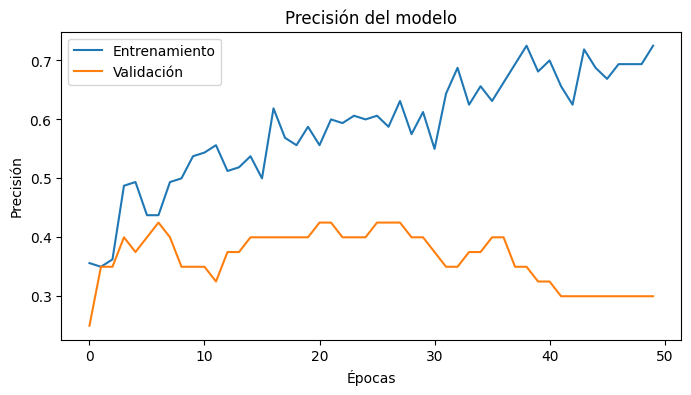

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
🔮 Predicción para lote de ejemplo: Reproceso


In [ ]:
# ================================================
# RED NEURONAL PARA PROCESOS DE CHOCOLATE ARTESANAL
# ================================================

# 1. Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 2. Crear base de datos simulada de procesos
np.random.seed(42)  # reproducibilidad
n = 200  # número de lotes simulados

df = pd.DataFrame({
    "Humedad_Cacao": np.random.uniform(5.5, 8.5, n),
    "Tamano_Grano": np.random.choice(["Pequeño","Mediano","Grande"], n),
    "Temp_Tostado": np.random.uniform(135, 150, n),
    "Tiempo_Tostado": np.random.uniform(45, 75, n),
    "Rendimiento_Nibs": np.random.uniform(80, 85, n),
    "Tamano_Molienda": np.random.uniform(200, 500, n),
    "Tiempo_Conchado": np.random.uniform(12, 72, n),
    "Viscosidad": np.random.uniform(2000, 5000, n),
    "Temp_Temperado": np.random.uniform(26, 32, n),
    "Tiempo_Enfriado": np.random.uniform(30, 60, n),
    "Inspeccion_Brillo": np.random.choice(["Bueno","Regular","Defectuoso"], n),
    "Decoracion": np.random.choice(["Frutos secos","Transfer","Ninguna"], n),
    "Calidad_Final": np.random.choice(["Primera","Segunda","Reproceso"], n)
})

# 3. Preprocesamiento de datos
# Variables categóricas -> numéricas
df = pd.get_dummies(df, columns=["Tamano_Grano", "Inspeccion_Brillo", "Decoracion"], drop_first=True)

# Separar X (inputs) y y (salida)
X = df.drop("Calidad_Final", axis=1)
y = df["Calidad_Final"]

# Codificar salida (Primera, Segunda, Reproceso)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Escalar entradas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# 4. Definir la red neuronal MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_cat.shape[1], activation='softmax')
])

# 5. Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Entrenar
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=1)

# 7. Evaluar resultados
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Precisión en datos de prueba: {acc*100:.2f}%")

# 8. Graficar el entrenamiento
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Precisión del modelo")
plt.legend()
plt.show()

# 9. Predicción con un lote de ejemplo
ejemplo = np.array([X_test[0]])
pred = model.predict(ejemplo)
clase_pred = label_encoder.inverse_transform([np.argmax(pred)])
print("🔮 Predicción para lote de ejemplo:", clase_pred[0])
